# Images with Minimal Background

**Scott Prahl**

**March 2020, Version 2**

In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

pixel_size_mm = 3.75/1000           # pixel size in mm for the camera

## Closely centered beam

Bright center, low background.  Beam is roughly 1/10 of the entire image.  Could not be easier.  

This is a Helium-Neon laser beam that is operating close to the TEM$_{00}$ mode.

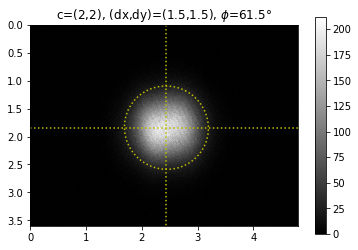

In [2]:
beam = imageio.imread("t-hene.pgm")

xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(beam)
lbs.plot_image_and_ellipse(beam,xc_found, yc_found, dx_found, dy_found, phi_found, scale=pixel_size_mm)

### Show cross sections

The circle drawn above certainly looks plausible, but what do cross sections (horizontal and vertical) look like?

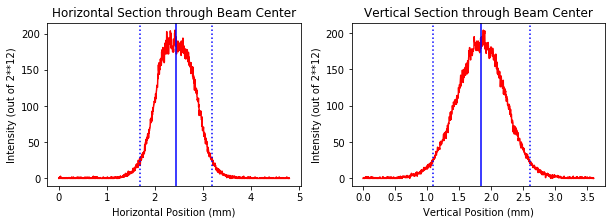

In [10]:
f, ax = plt.subplots(1,2,figsize=(10,3))

v,h = beam.shape
xcc = xc_found * pixel_size_mm
ycc = yc_found * pixel_size_mm
dxx = dx_found * pixel_size_mm
dyy = dy_found * pixel_size_mm

# plot a horizontal cross section 
xpos = np.arange(h)*pixel_size_mm
ypos = np.arange(v)*pixel_size_mm
hcenter=int(xc_found)
vcenter=int(yc_found)
plt.subplot(1,2,1)
plt.plot(xpos,beam[vcenter,:],color='red')
plt.axvline(xcc, color='blue')
plt.axvline(xcc+dxx/2,linestyle=":",color='blue')
plt.axvline(xcc-dxx/2,linestyle=":",color='blue')

plt.xlabel('Horizontal Position (mm)')
plt.ylabel('Intensity (out of 2**12)')
plt.title("Horizontal Section through Beam Center")

plt.subplot(1,2,2)
plt.plot(ypos,beam[:,hcenter],color='red')
plt.axvline(ycc, color='blue')
plt.axvline(ycc+dyy/2,linestyle=":",color='blue')
plt.axvline(ycc-dyy/2,linestyle=":",color='blue')

plt.xlabel('Vertical Position (mm)')
plt.ylabel('Intensity (out of 2**12)')
plt.title("Vertical Section through Beam Center")
plt.show()

Further analysis of this beam image can be found in the Jupyter notebook on the [razor blade technique](05-Razor-Blade.html)

## Twelve different images near focus

This shows how the default threshold of 0.1 (ten percent of the maximum value in the image) works with a good set of images.  

These are reasonable noise-free images measured near the focus of a beam.  

In [11]:
# array of distances at which images were collected
z1 = [168,210,280,348,414,480,495,510,520,580,666,770] #mm

# array of filenames associated with each image
fn1 = ["t-%dmm.pgm" % number for number in z1]

# read them all into memory 
test_img = [imageio.imread(fn) for fn in fn1]

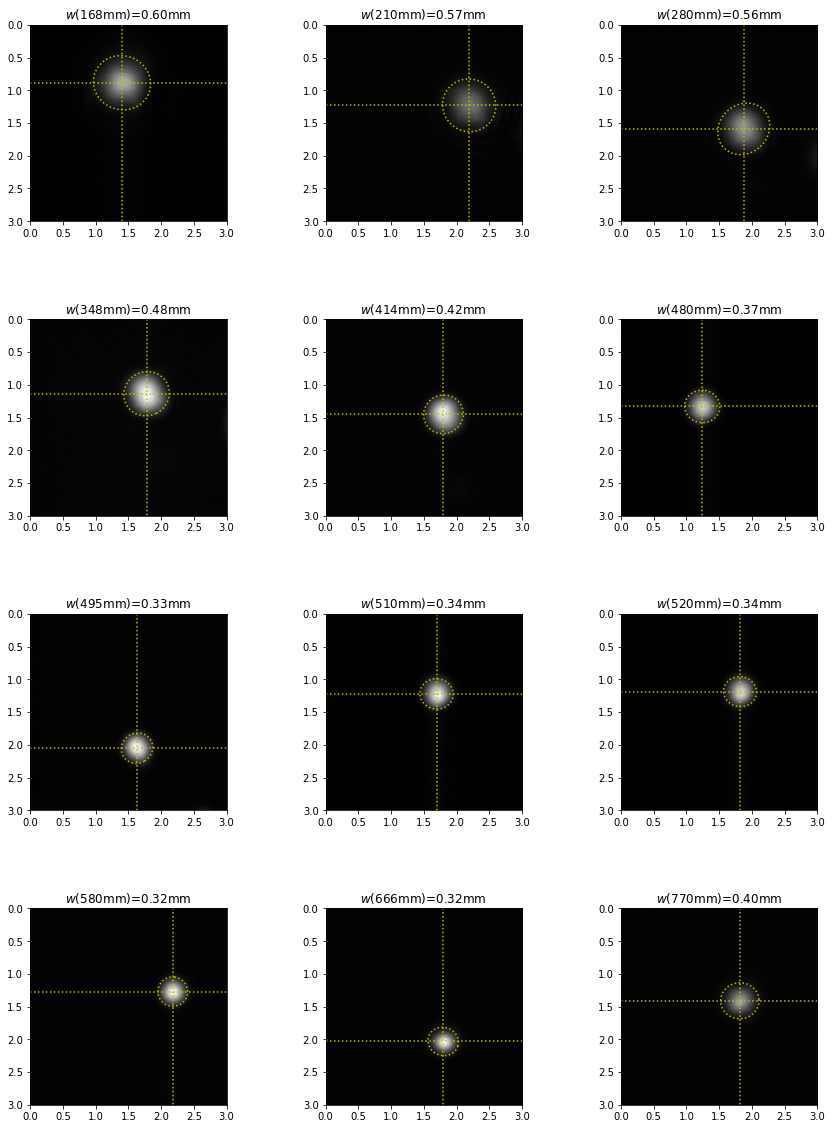

In [12]:
f, axs = plt.subplots(4,3,figsize=(15,15))

for i in range(12):
    plt.subplot(4,3,i+1)

    # show the beam image with actual dimensions on the axes
    v,h=test_img[i].shape
    plt.imshow(test_img[i], extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gray')

    # find the beam center and show it
    xc, yc, dx, dy, phi = lbs.beam_size(test_img[i])
    plt.plot([xc* pixel_size_mm,xc* pixel_size_mm],[0,v* pixel_size_mm],':y')
    plt.plot([0,h* pixel_size_mm],[yc* pixel_size_mm,yc* pixel_size_mm],':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc,yc,dx,dy,phi)
    plt.plot(xp* pixel_size_mm,yp* pixel_size_mm,':y')

    plt.xlim(0,h* pixel_size_mm)
    plt.ylim(v* pixel_size_mm,0)

    # calculate 1/e^2 radius for symmetric beam to label image
    r=np.sqrt(dx**2+dy**2)/2*pixel_size_mm
    plt.title('$w$(%dmm)=%.2fmm'%(z1[i],r))

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()

The algorithm finds each beam and produces reasonable beam diameters.